##Obtain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.listdir())

['.config', 'hcvdat0.csv', 'sample_data']


In [4]:
dataset = pd.read_csv("hcvdat0.csv")
dataset.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
dataset.info

<bound method DataFrame.info of      Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23

The dataset contains 11 numerical variables and 3 categorical variables. Category is the target attribute.

# Scrub

In [6]:
dataset.nunique()

Unnamed: 0    615
Category        5
Age            49
Sex             2
ALB           189
ALP           414
ALT           341
AST           297
BIL           188
CHE           407
CHOL          313
CREA          117
GGT           358
PROT          198
dtype: int64

The Unnamed column contains all unique values and does not have any effect in the prediction. Hence, it will be dropped from the dateset.

##Drop the unnecessary column

In [7]:
dataset = dataset.drop(columns=(['Unnamed: 0']))

##Identify Duplicate Entries

In [8]:
dataset.duplicated().sum()

0

There is no duplicate entry in the dataset.

###Identify Null Values

In [9]:
dataset.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

There are missing values in ALB, ALP, ALT, CHOL and PROT.



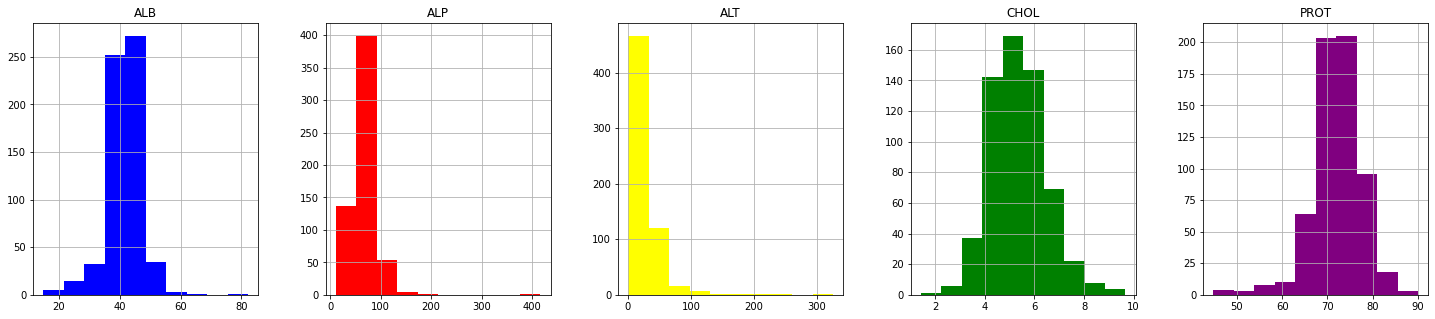

In [10]:
nullvalues = ['ALB','ALP','ALT','CHOL','PROT']
fig, axs = plt.subplots(1, 5, figsize=(25, 5)) 
colors=['blue','red','yellow','green','purple']
for ax, color, nullvalue in zip(axs,colors, nullvalues):
  dataset.hist(column=nullvalue,ax=ax,color=color)
  ax.set_title(nullvalue)
plt.show()

The result above showed that ALP, ALT and CHOL are right-skewed, ALB and PROT are left-skewed. As a result, all the missing values will be imputed by median.

##Handling Null Values

In [11]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan,strategy="median")
imputer1.fit(dataset.iloc[:,[3,4,5,9,12]])
dataset.iloc[:,[3,4,5,9,12]]=imputer1.transform(dataset.iloc[:,[3,4,5,9,12]])
dataset.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

##Convert Categorical Data to Numerical Data

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Sex"]=le.fit_transform(dataset["Sex"]) #1 = m(male); 0 = f(female)

dataset['Category'] = dataset['Category'].map({'0=Blood Donor': 0,'0s=suspect Blood Donor': 0,'1=Hepatitis': 1,'2=Fibrosis': 2,'3=Cirrhosis': 3}) #0 = Healthy; 1 = Hepatitis; 2 = Fibrosis; 3 = Cirrhosis

In [13]:
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#Explore

##Attibute's Distribution
The information of the attribute's distribution is shown is Table 1. Violin plot is ploted at Figure 1 to visualize the distribution.

In [14]:
data_cont=dataset.drop(columns=['Category','Sex'])
data_dist=dataset[['Category','Sex']]

###Table

In [15]:
data_cont.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


###Violin Plot

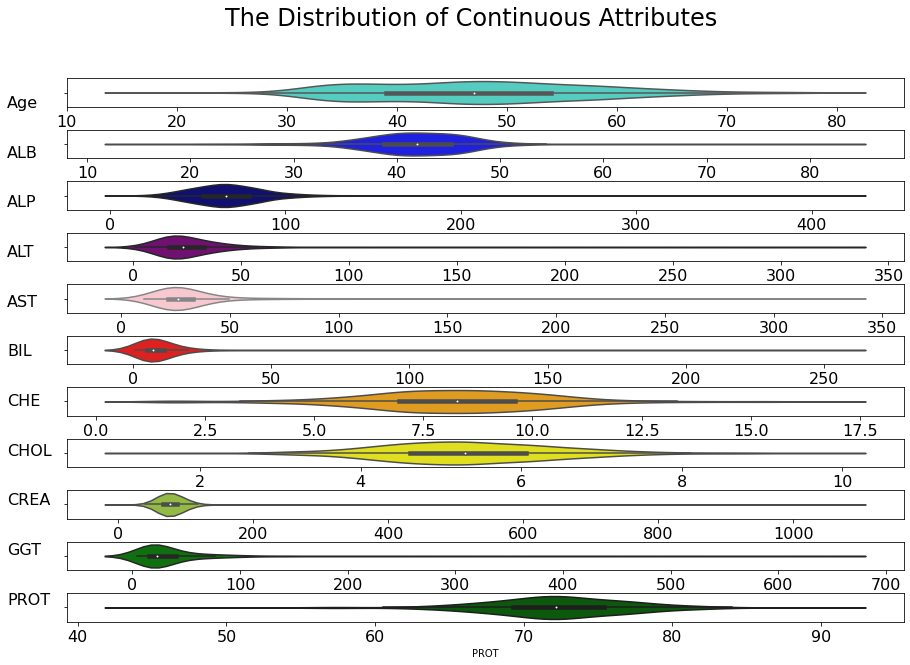

In [16]:
fig,axes=plt.subplots(11,1,figsize=(15,10))
fig.suptitle('The Distribution of Continuous Attributes',fontsize=24)
colors=['turquoise','blue','navy','purple','pink','red','orange','yellow','yellowgreen','green','darkgreen']

y=0.84
for ax,color,column in zip(axes,colors,data_cont.columns):
  sns.violinplot(ax=ax,x=dataset[column],color=color).tick_params(axis='x', labelsize=16)
  fig.text(0.07, y, column,fontsize=16)
  y-=0.069
plt.subplots_adjust(wspace=0.2,hspace=0.8)
plt.savefig("violin.png",transparent=True)

figure 4 show the distribution of the each continuous attribute. from the figure 4, we can observe righted skwed distribution for ALP, ALT, AST, BIL, CREA and GGT. Age, ABL, BIL and CHE have approximate symmetric distribution. PROT have slight lefted skwed distribution.

### Normality Testing: Shapiro-Wilk test
normallity testing is carried out to test the type of distribution of the data. if the data is normal, parametric statistics is applied for the hypothesis testing and non-parametric statistics is applied for non-normal data.
```
  H0: the distribution of attribute is normal
  H1: the distribution of attribute is not normal
```
the attribute is not normal is p-value is less than the significant value, 0.05.

In [17]:
from scipy.stats import shapiro
test1=pd.DataFrame(columns=["Statistics","p-value","Decisions","Distribution"])
for i in data_cont.columns:
  test_statistic, p_value = shapiro(dataset[i])
  if p_value <0.01:
    decisions="H0 rejected"
    normal="Not normal distributed"
  else:
    decisions="H0 is failed to rejected"
    normal="normal distributed"
  test1=test1.append({"Statistics":test_statistic,"p-value":round(p_value,5),"Decisions":decisions,"Distribution":normal},ignore_index=True)
display(test1)


,Statistics,p-value,Decisions,Distribution
0,0.984102,0.00000,H0 rejected,Not normal distributed
1,0.928105,0.00000,H0 rejected,Not normal distributed
2,0.766053,0.00000,H0 rejected,Not normal distributed
3,0.581511,0.00000,H0 rejected,Not normal distributed
4,0.470580,0.00000,H0 rejected,Not normal distributed
5,0.312252,0.00000,H0 rejected,Not normal distributed
6,0.980956,0.00000,H0 rejected,Not normal distributed
7,0.989226,0.00017,H0 rejected,Not normal distributed
8,0.246592,0.00000,H0 rejected,Not normal distributed
9,0.480422,0.00000,H0 rejected,Not normal distributed


from the shapiro-wilk result, there is 99% confidence that the all attribute are not normally distributed. non-parametric is carried out.

In [18]:
Category=pd.DataFrame(data_dist.Category.value_counts())
Category.rename(index={0:"Healthy",1:"Hepatitis",2:"Fibrosis",3:"Cirrhosis"},inplace=True)
Sex=pd.DataFrame(data_dist.Sex.value_counts())
Sex.rename(index={0:"Male",1:"Female"},inplace=True)
display(Category)
display(Sex)

,Category
Healthy,540
Cirrhosis,30
Hepatitis,24
Fibrosis,21


,Sex
Female,377
Male,238


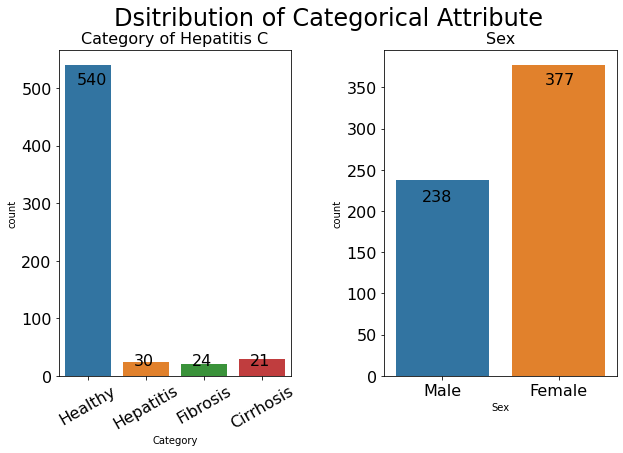

In [19]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
fig.suptitle("Dsitribution of Categorical Attribute",fontsize=24)
ax1=sns.countplot(ax=axes[0],x=dataset.Category)
ax1.set_xticklabels(['Healthy','Hepatitis','Fibrosis','Cirrhosis'],size=16,rotation=30)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_title("Category of Hepatitis C",size=16)
fig.text(0.15, 0.8, 540,fontsize=16)
fig.text(0.23, 0.15, 30,fontsize=16)
fig.text(0.31, 0.15, 24,fontsize=16)
fig.text(0.39, 0.15, 21,fontsize=16)

ax2=sns.countplot(ax=axes[1],x=dataset.Sex)
ax2.set_xticklabels(['Male','Female'],size=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_title("Sex",size=16)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
fig.text(0.8, 0.8, 377,fontsize=16)
fig.text(0.63, 0.53, 238,fontsize=16)

plt.savefig("bar.png",transparent=True)

Figure 5 showed the distribution of the categorical attributed. for the category attribute which is also the target attribute, it is said to be imbalance as the healthy has the highest frequency of 86.8% of the dataset which indicate about 86.8% of the respondence does not infected hepatitis C virus.

The another bar chart showed the nmber of female is more than male in this dataset.

## distribution of 11 continuous attributes

In [20]:
healthy = dataset.loc[dataset['Category'].isin([0])]
healthy=healthy.drop(columns=['Category','Sex'])

hepatitis = dataset[dataset['Category'].isin([1])]
hepatitis=hepatitis.drop(columns=['Category','Sex'])

Fibrosis = dataset[dataset['Category'].isin([2])]
Fibrosis=Fibrosis.drop(columns=['Category','Sex'])

Cirrhosis = dataset[dataset['Category'].isin([3])]
Cirrhosis=Cirrhosis.drop(columns=['Category','Sex'])

Text(0.5, 1.0, 'Age')

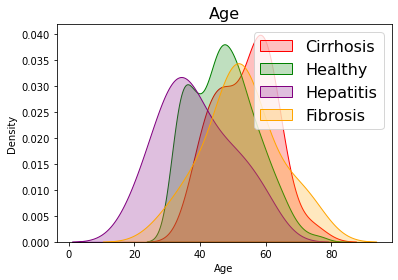

In [21]:
sns.kdeplot('Age', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('Age', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('Age', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('Age', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('Age',size=16)

The figure shows more younger generator has higher probability of having hepatitis diseases.

Text(0.5, 1.0, 'ALB')

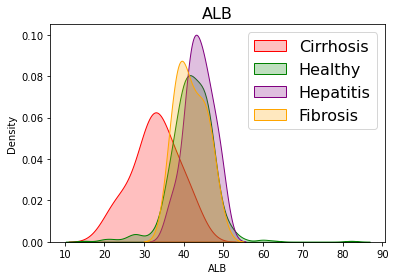

In [22]:
sns.kdeplot('ALB', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('ALB', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('ALB', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('ALB', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('ALB',size=16)

The figure shows low albumn level indicate Cirrhosis diseases

Text(0.5, 1.0, 'ALP')

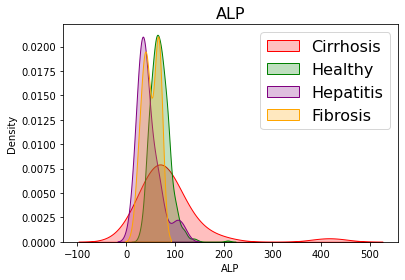

In [23]:
sns.kdeplot('ALP', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('ALP', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('ALP', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('ALP', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('ALP',size=16)

The figure shows the lower the level of lakaline phosphatase, the higher the risks of having HCV diseases. This align with the finding for the research by Bodlaj et. al. (2010)

Text(0.5, 1.0, 'ALT')

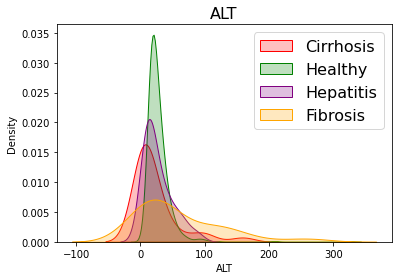

In [24]:
sns.kdeplot('ALT', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('ALT', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('ALT', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('ALT', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('ALT',size=16)

Normal blood test results for typical liver function tests include: ALT. 7 to 55 units per liter (U/L) AST. 8 to 48 U/L. The figure shows that the healthy distributed in normal range. Accoring to Veterans Affairs (n.d.), a higher value of ALT may indicate a liver damage, however, with a normal range of ALT value does not indicate a healthy liver. Therefore, the distribution of ALF for hepatitis, cirrhosis and fibrosis are concentrated near to the normal range of ALT but also have a small group of patient with high ALT.

Text(0.5, 1.0, 'AST')

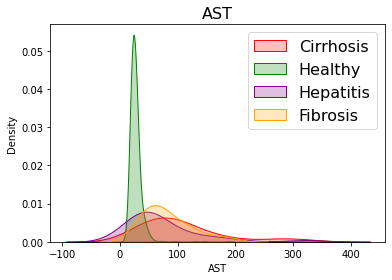

In [25]:
sns.kdeplot('AST', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('AST', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('AST', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('AST', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('AST',size=16)

Normal blood test results for typical liver function tests for AST. is in range of 8 to 48 unit per liter. The figure shown the AST for the healthy group concentrate at a normal AST range. the higher the value of AST shown a more chonic diseases of HCV. 

Text(0.5, 1.0, 'BIL')

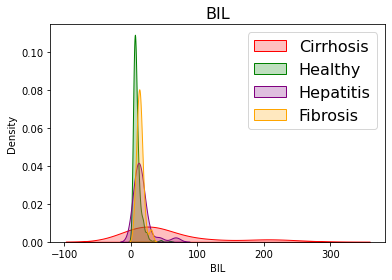

In [26]:
sns.kdeplot('BIL', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('BIL', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('BIL', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('BIL', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('BIL',size=16)

The figure shows the distribution of bilirubin (BIL) is similar among the 4 categories. We may assume that there is no difference in the level of bilirubin among these 4 categories. To prove this assumption, a Kruskal Wallis test is selected to test the dependency of creatine with the level of liver health.
```
H0: The median of the level of bilirubin for 4 category are the same
H1: At least one of the 4 category of different median of the level of bilirubin
```

In [27]:
from scipy import stats
kruskalStatistic,p_value=stats.kruskal(healthy['BIL'], hepatitis['BIL'],Fibrosis['BIL'],Cirrhosis['BIL'])
if p_value<0.01:
  decision="reject H0"
else:
  decision="fail to reject H0"
test_result={"Statistics":kruskalStatistic,"p-value":round(p_value,5),"Decisions":decision}
print(pd.Series(test_result))

Statistics    94.561523
p-value             0.0
Decisions     reject H0
dtype: object


Text(0.5, 1.0, 'CHE')

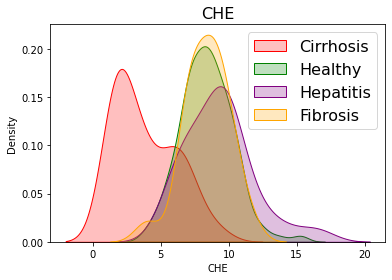

In [28]:
sns.kdeplot('CHE', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('CHE', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('CHE', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('CHE', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('CHE',size=16)

The figrue shows cirrhosis has a very low level of Cholinesterase. the cholinesterase is very sensitive towards chronic level damage and is effectively used as a biomakers to diagnose the HCV diseases (Salama et al., 2019).

Text(0.5, 1.0, 'CHOL')

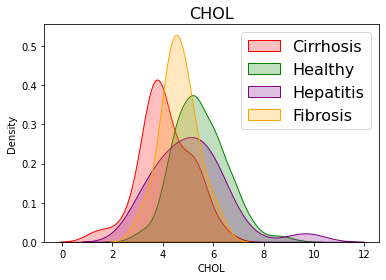

In [29]:
sns.kdeplot('CHOL', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('CHOL', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('CHOL', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('CHOL', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('CHOL',size=16)

The distribution show that HCV patients has lower cholesterol level.

Text(0.5, 1.0, 'CREA')

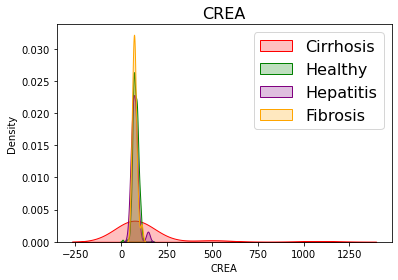

In [30]:
sns.kdeplot('CREA', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('CREA', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('CREA', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('CREA', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('CREA',size=16)

from the figure, we can observe the distribution for 4 lever of liver are similar. We may concluded that creatime (CREA) level may not associate with the liver problems. To prove this statement, a kruskal wallis test is selected to test the dependency of creatime with the level of liver health.
```
H0: The median of the level of creatime for 4 category are the same
H1: At least one of the 4 category of different median of the level of creatime
```

In [31]:
from scipy import stats
kruskalStatistic,p_value=stats.kruskal(healthy['CREA'], hepatitis['CREA'],Fibrosis['CREA'],Cirrhosis['CREA'])
if p_value<0.01:
  decision="reject H0"
else:
  decision="fail to reject H0"
test_result={"Statistics":kruskalStatistic,"p-value":round(p_value,5),"Decisions":decision}
print(pd.Series(test_result))

Statistics             9.487463
p-value                 0.02347
Decisions     fail to reject H0
dtype: object


from the result, H0 is failed to rejected. Therefore, we can conclude that we are 99% confidence that the 4 distribution does not have significant different.

Text(0.5, 1.0, 'GGT')

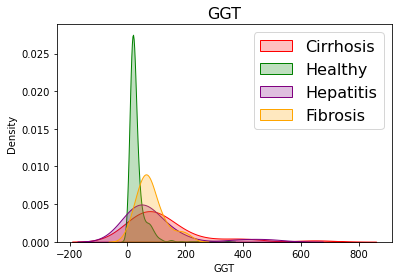

In [32]:
sns.kdeplot('GGT', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('GGT', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('GGT', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('GGT', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('GGT',size=16)


Based on the figure, HCV patients have higher level of GGT. This findings align with the statement from Cleveland Chinic (n. d.) which mention that the higher the value of GGT in blood test, means the higher severity of the liver damage. Therefore, healthcare most often apply GGT blood test to assists the diagnosis of liver diseases.

Text(0.5, 1.0, 'PROT')

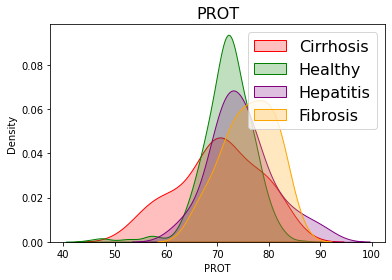

In [33]:
sns.kdeplot('PROT', data=Cirrhosis, shade=True, color='red', label='Cirrhosis')
sns.kdeplot('PROT', data=healthy, shade=True, color='green', label='Healthy')
sns.kdeplot('PROT', data=hepatitis, shade=True, color='purple', label='Hepatitis')
sns.kdeplot('PROT', data=Fibrosis, shade=True, color='orange', label='Fibrosis')
plt.legend(labels=["Cirrhosis","Healthy","Hepatitis","Fibrosis"],prop={'size': 16})
plt.title('PROT',size=16)

The figure shows the from the figure, we can observe the distribution for 4 lever of liver are similar. We may concluded that protein level may not associate with the liver problems. To prove this statement, a kruskal wallis test is selected to test the dependency of protein with the level of liver health.
```
H0: The median of the level of protein for 4 category are the same
H1: At least one of the 4 category of different median of the level of protein
```

In [34]:
from scipy import stats
kruskalStatistic,p_value=stats.kruskal(healthy['PROT'], hepatitis['PROT'],Fibrosis['PROT'],Cirrhosis['PROT'])
if p_value<0.01:
  decision="reject H0"
else:
  decision="fail to reject H0"
test_result={"Statistics":kruskalStatistic,"p-value":round(p_value,5),"Decisions":decision}
print(pd.Series(test_result))

Statistics    17.548341
p-value         0.00055
Decisions     reject H0
dtype: object


Since the H0 is rejected. We may rejected out assumption that the distribution of protein level for 4 category are similar. There is at least one category have a higher or lower value of protein.

Text(0.5, 1.0, 'Sex')

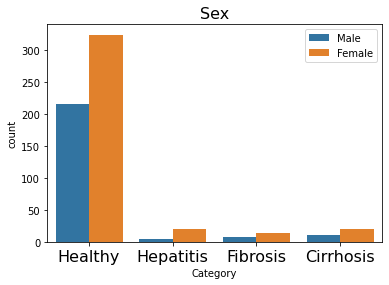

In [35]:
ax=sns.countplot(x=dataset['Category'],hue=dataset['Sex'])
ax.set_xticklabels(['Healthy','Hepatitis','Fibrosis','Cirrhosis'],size=16)
plt.legend(labels=['Male','Female'])
plt.title('Sex',size=16)

Chi-Square Test is implemented to identify the dependency of the two categorical attributes, Category and Sex. 
```
H0: The Sex is not associate with the HCV Category
H1: The Sex is associate with the HCV Category
```

In [36]:
from scipy.stats import chi2_contingency
#dataset.Category1 = dataset.Category.map({0:0,1:1,2:1,3:1})
ct_table=pd.crosstab(dataset.Category,dataset.Sex)
chi2, p, dof, ex = chi2_contingency(ct_table)
if p<0.01:
  decision="reject H0"
else:
  decision="fail to reject H0"
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print(f"decision: {decision}")

chi2 statistic:     5.6635
p-value:            0.12918
degrees of freedom: 3
decision: fail to reject H0


The result showed a statistics of 5.6635 and p-value of 0.13. Since the p-value is greater than the signifiant level, 0.01, H0 is failed to reject. Therefore, the result shown that the Sex for 4 category is independent and not infuence each other.

##Correlation Matrix
correlation matrix is plot to identified the relationship between the attributes and the target features.  multicollinearity exist when the the relationship attribute is higher than 0.8. The multicollinearity attribute will effect the accuracy of the modeling. therefore, it should excute from the modeling.

###Spearman Coefficient Correlation Table

In [37]:
corr=dataset.corr(method="spearman")
corr

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.061192,0.068209,-0.160019,-0.160642,-0.123037,0.502029,0.386236,-0.175036,-0.273704,-0.119426,0.409066,0.074523
Age,0.061192,1.000000,-0.037524,-0.160095,0.175817,-0.045209,0.086856,-0.004857,-0.052759,0.170779,-0.048174,0.100378,-0.100728
Sex,0.068209,-0.037524,1.000000,0.212574,0.026280,0.312643,0.311695,0.258432,0.196976,-0.032814,0.502597,0.312013,0.087227
ALB,-0.160019,-0.160095,0.212574,1.000000,-0.052620,0.181885,0.026519,0.102400,0.326920,0.138732,0.242816,0.032285,0.512178
ALP,-0.160642,0.175817,0.026280,-0.052620,1.000000,0.203934,0.052964,-0.077833,0.126417,0.147295,0.051317,0.149642,0.020887
ALT,-0.123037,-0.045209,0.312643,0.181885,0.203934,1.000000,0.496456,0.140599,0.328030,0.165892,0.297449,0.418904,0.217836
AST,0.502029,0.086856,0.311695,0.026519,0.052964,0.496456,1.000000,0.356030,0.101771,-0.061021,0.163123,0.505379,0.170771
BIL,0.386236,-0.004857,0.258432,0.102400,-0.077833,0.140599,0.356030,1.000000,-0.067887,-0.115163,0.189692,0.247291,0.143776
CHE,-0.175036,-0.052759,0.196976,0.326920,0.126417,0.328030,0.101771,-0.067887,1.000000,0.396473,0.209800,0.155852,0.292684
CHOL,-0.273704,0.170779,-0.032814,0.138732,0.147295,0.165892,-0.061021,-0.115163,0.396473,1.000000,0.069052,0.063495,0.155040


###p-value of Spearman Coefficient Correlation Table

In [38]:
from scipy.stats import spearmanr
dataset.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(len(dataset.columns)) 

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,0.000000e+00,0.129557,9.101592e-02,6.720171e-05,6.288529e-05,2.238333e-03,1.413211e-40,2.586918e-23,1.267358e-05,4.980323e-12,3.014445e-03,3.288085e-26,6.475824e-02
Age,1.295567e-01,0.000000,3.528900e-01,6.666361e-05,1.157368e-05,2.629567e-01,3.126800e-02,9.043275e-01,1.913415e-01,2.063667e-05,2.328907e-01,1.275595e-02,1.244593e-02
Sex,9.101592e-02,0.352890,0.000000e+00,1.027002e-07,5.153706e-01,2.065403e-15,2.532757e-15,7.681037e-11,8.513136e-07,4.166030e-01,1.117171e-40,2.365563e-15,3.054962e-02
ALB,6.720171e-05,0.000067,1.027002e-07,0.000000e+00,1.925138e-01,5.642989e-06,5.115561e-01,1.105505e-02,8.754142e-17,5.602831e-04,1.054593e-09,4.241589e-01,1.981998e-42
ALP,6.288529e-05,0.000012,5.153706e-01,1.925138e-01,0.000000e+00,3.381919e-07,1.896205e-01,5.370793e-02,1.682179e-03,2.469654e-04,2.037714e-01,1.957454e-04,6.051742e-01
ALT,2.238333e-03,0.262957,2.065403e-15,5.642989e-06,3.381919e-07,0.000000e+00,1.385211e-39,4.704547e-04,6.798533e-17,3.560605e-05,4.972334e-14,1.578246e-27,4.847160e-08
AST,1.413211e-40,0.031268,2.532757e-15,5.115561e-01,1.896205e-01,1.385211e-39,0.000000e+00,8.122812e-20,1.156116e-02,1.306378e-01,4.816824e-05,3.510540e-41,2.065474e-05
BIL,2.586918e-23,0.904327,7.681037e-11,1.105505e-02,5.370793e-02,4.704547e-04,8.122812e-20,0.000000e+00,9.255611e-02,4.240971e-03,2.161388e-06,5.069188e-10,3.477409e-04
CHE,1.267358e-05,0.191341,8.513136e-07,8.754142e-17,1.682179e-03,6.798533e-17,1.156116e-02,9.255611e-02,0.000000e+00,1.387070e-24,1.514119e-07,1.040756e-04,1.298188e-13
CHOL,4.980323e-12,0.000021,4.166030e-01,5.602831e-04,2.469654e-04,3.560605e-05,1.306378e-01,4.240971e-03,1.387070e-24,0.000000e+00,8.708238e-02,1.157149e-01,1.131993e-04


###Spearman Correlation Coefficient Heatmap

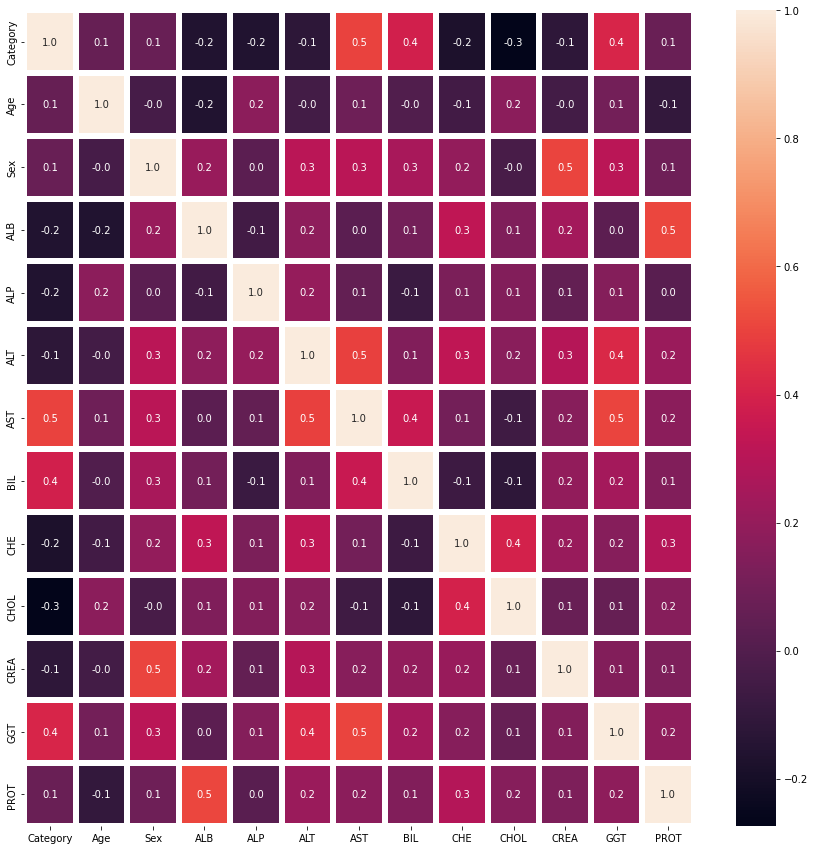

In [39]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,linewidth=5,fmt='.1f',ax=ax)
plt.savefig("heatplot.png")
plt.show()

from the correlation table and correlation matrix. there is no multicollinearity exist in this dataset.

Comparison of each attribute among different HCV categories is carried out, the findings showed that all attributes are dependent towards category except for the CREA and Sex attributes. The Spearman correlation also shows that Age, Sex and PROT have no relationship towards the category attributes. Therefore, we conclude that Age, Sex, CREA and PROT attributes are not the main attributes that contribute to the result of the prediction of HCV. Therefore, Age, Sex, CREA and PROT are excluded from the dataset for modelling purpose.

#Modeling

In [40]:
# 0 = Healthy; 1 = Hepatitis; 2 = Fibrosis; 3 = Cirrhosis
dataset.Category.value_counts()

0    540
3     30
1     24
2     21
Name: Category, dtype: int64

The dataset shows that the category is imbalance

In [41]:
# select features ALB, ALP, AST, BIL, CHE, CHOL and GGT as X into the model
# Select category as target features y
dataset_feature = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','GGT']

X = dataset.loc[:,dataset_feature]
y = dataset.Category
X.head()

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,GGT
0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,12.1
1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,15.6
2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,33.2
3,43.2,52.0,30.6,22.6,18.9,7.33,4.74,33.8
4,39.2,74.1,32.6,24.8,9.6,9.15,4.32,29.9


In [42]:
#split the data into train and test with portion 70,30
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

##KNN

In [43]:
#Train dataset into KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
KNN = KNeighborsClassifier()
KNN=KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)

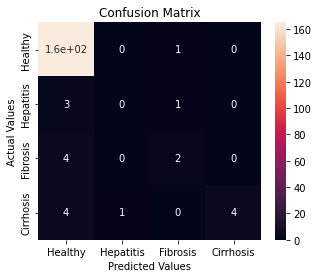

In [44]:
#plot KNN confusion matrix
cm = metrics.confusion_matrix(y_test, KNN_pred)
cm_KNN = pd.DataFrame(cm,
                     index = ['Healthy','Hepatitis','Fibrosis', 'Cirrhosis'], 
                     columns = ['Healthy','Hepatitis','Fibrosis', 'Cirrhosis'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_KNN, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
#Calculate test score and train score to evaluate whether the model is underfit or overfit
score=pd.DataFrame(columns=["model","test score","train score"])
score.loc[0]=["K-Nearest Neighbors",KNN.score(X_test, y_test),KNN.score(X_train, y_train)]

In [46]:
#Calculate the performance matrics accuracy, percision, recall and f1 score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_KNN = accuracy_score(y_test, KNN_pred)
precision_KNN = precision_score(y_test, KNN_pred, average='weighted')
recall_KNN = recall_score(y_test, KNN_pred, average='weighted')
f1_KNN = f1_score(y_test, KNN_pred, average='weighted')

accuracyDF = pd.DataFrame(columns=['model','accuracy','precision',"recall","f1"])
accuracyDF.loc[0]=["K-Nearest Neighbors",accuracy_KNN, precision_KNN, recall_KNN, f1_KNN]

In [47]:
# Calculate the weighted-averaged and macro-averaged AUC for KNN
from sklearn.metrics import roc_curve, roc_auc_score, auc
KNN_probs = KNN.predict_proba(X_test)

KNN_weighted_auc = roc_auc_score(y_test, KNN_probs, average='weighted', multi_class='ovr')
KNN_macro_auc = roc_auc_score(y_test, KNN_probs, average='macro', multi_class='ovr')

auc_score=pd.DataFrame(columns=["model","weighted auc","macro auc"])
auc_score.loc[0]=["K-Nearest Neighbors",KNN_weighted_auc,KNN_macro_auc]

In sklearn version 0.23 and higher, the roc_auc_score function and the plot_roc_curve function support the average parameter, which specifies the type of averaging to use when calculating the AUC (Area Under the Curve) or plotting the ROC curve. The possible values for the average parameter are 'micro' and 'macro'

In an older version of sklearn, the average parameter may only support the value 'weighted'. The 'weighted' average calculates the average of the AUC values or ROC curve for each class, weighting each class by the number of samples in that class.

So, the main difference between the weight ROC and the micro ROC is that the weight ROC takes into account the class balance, while the micro ROC does not. The macro ROC, on the other hand, treats all classes equally, regardless of the class balance.

##Decision Tree


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DT = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
DT=DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

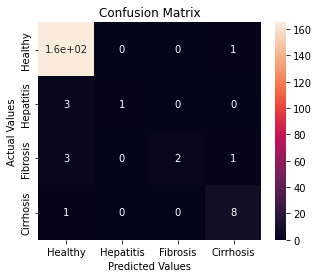

In [49]:
# plot Decision Tree confusion matrix
cm = metrics.confusion_matrix(y_test, DT_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Hepatitis','Fibrosis', 'Cirrhosis'], 
                     columns = ['Healthy','Hepatitis','Fibrosis', 'Cirrhosis'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [50]:
# Calculate test score and train score to evaluate whether the model is underfit or overfit
score.loc[1]=["Decision Tree",DT.score(X_test, y_test),DT.score(X_train, y_train)]

In [51]:
# Calculate the performance matrics accuracy, percision, recall and f1 score
accuracy_DT = accuracy_score(y_test, DT_pred)
precision_DT = precision_score(y_test, DT_pred, average='weighted')
recall_DT = recall_score(y_test, DT_pred, average='weighted')
f1_DT = f1_score(y_test, DT_pred, average='weighted')

accuracyDF.loc[1]=["Decision Tree",accuracy_DT, precision_DT, recall_DT, f1_DT]

In [52]:
# Calculate the weighted-averaged and macro-averaged AUC for Decision Tree
DT_probs = DT.predict_proba(X_test)
DT_weighted_auc = roc_auc_score(y_test, DT_probs, average='weighted', multi_class='ovr')
DT_macro_auc = roc_auc_score(y_test, DT_probs, average='macro', multi_class='ovr')

auc_score.loc[1]=["Decision Tree",DT_weighted_auc,DT_macro_auc]

## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
#fit model
NB=NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

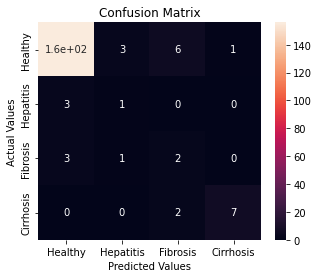

In [54]:
# plot Naiye Bayes confusion matrix
cm = metrics.confusion_matrix(y_test, NB_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Hepatitis','Fibrosis', 'Cirrhosis'], 
                     columns = ['Healthy','Hepatitis','Fibrosis', 'Cirrhosis'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
# Calculate test score and train score to evaluate whether the model is underfit or overfit
score.loc[2]=["Naive Bayes",NB.score(X_test, y_test),NB.score(X_train, y_train)]

In [56]:
# Calculate the performance matrics accuracy, percision, recall and f1 score
accuracy_NB = accuracy_score(y_test, NB_pred)
precision_NB = precision_score(y_test, NB_pred, average='weighted')
recall_NB = recall_score(y_test, NB_pred, average='weighted')
f1_NB = f1_score(y_test, NB_pred, average='weighted')

accuracyDF.loc[2]=["Naive Bayes",accuracy_NB, precision_NB, recall_NB, f1_NB]

In [57]:
# Calculate the weighted-averaged and macro-averaged AUC for Naive Bayes
NB_probs = NB.predict_proba(X_test)

NB_weighted_auc = roc_auc_score(y_test, NB_probs, average='weighted', multi_class='ovr')
NB_macro_auc = roc_auc_score(y_test, NB_probs, average='macro', multi_class='ovr')

auc_score.loc[2]=["Naive Bayes",NB_weighted_auc,NB_macro_auc]

#Interpretation

### Overfitting or Underfitting

In [59]:
score

,model,test score,train score
0,K-Nearest Neighbors,0.924324,0.944186
1,Decision Tree,0.951351,0.948837
2,Naive Bayes,0.897297,0.913953


For KNN, Decision Tree and Naive Bayes the training-set accuracy score is quite comparable. So, there is no sign of overfitting.

###Accuracy, Recall, Precision, F1 score

In [60]:
accuracyDF

,model,accuracy,precision,recall,f1
0,K-Nearest Neighbors,0.924324,0.906081,0.924324,0.908724
1,Decision Tree,0.951351,0.953752,0.951351,0.941892
2,Naive Bayes,0.897297,0.917442,0.897297,0.906503


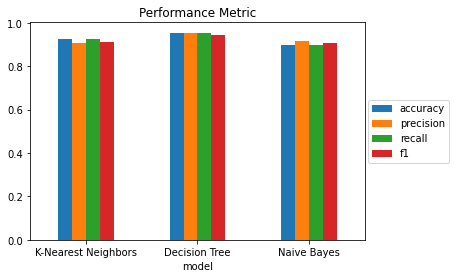

In [62]:
import matplotlib.pyplot as plt
#visualise the perforamce metric for comparing
accuracyDF.plot(x='model', y=["accuracy", "precision","recall","f1"], kind='bar',rot=0)
plt.legend(loc=10,bbox_to_anchor=(1.13, 0.5))
plt.title("Performance Metric")
plt.show()

Decision Tree has the  highest accuracy, precision, recall and f1-score among the 3 models.<br>
However, as the dataset are imbalance, accuracy, recall, precision and F1 measure may not be suitable performance metric for this dataset. Therefore, AUC is calculated and compare at the next section

###ROC graph



In [63]:
#show AUC score
auc_score

,model,weighted auc,macro auc
0,K-Nearest Neighbors,0.815474,0.788435
1,Decision Tree,0.788845,0.716067
2,Naive Bayes,0.945684,0.933214


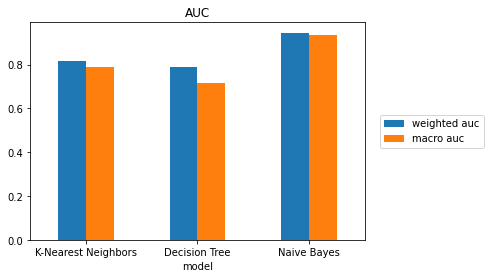

In [64]:
#Visualize the AUC value for compare
auc_score.plot(x='model', y=["weighted auc","macro auc"], kind='bar',rot=0)
plt.legend(loc=10,bbox_to_anchor=(1.2, 0.5))
plt.title("AUC")
plt.show()

Naive Bayes has the highest value of AUC. This indicate that Naive Bayes is the best model for HCV detection.

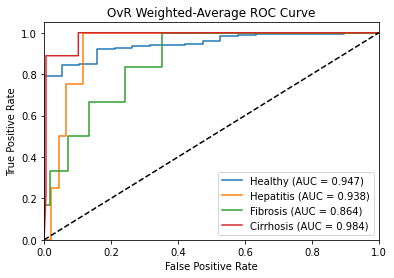

In [65]:
#plot ROC curve for Naive Bayes
NB_fpr_0, NB_tpr_0, NB_thresholds_0 = roc_curve(y_test, NB_probs[:, 0], pos_label=0)
NB_fpr_1, NB_tpr_1, NB_thresholds_1 = roc_curve(y_test, NB_probs[:, 1], pos_label=1)
NB_fpr_2, NB_tpr_2, NB_thresholds_2 = roc_curve(y_test, NB_probs[:, 2], pos_label=2)
NB_fpr_3, NB_tpr_3, NB_thresholds_3 = roc_curve(y_test, NB_probs[:, 3], pos_label=3)

NB_roc_auc_0 = auc(NB_fpr_0, NB_tpr_0)
NB_roc_auc_1 = auc(NB_fpr_1, NB_tpr_1)
NB_roc_auc_2 = auc(NB_fpr_2, NB_tpr_2)
NB_roc_auc_3 = auc(NB_fpr_3, NB_tpr_3)

plt.plot(NB_fpr_0, NB_tpr_0, label='Healthy (AUC = %0.3f)' % NB_roc_auc_0)
plt.plot(NB_fpr_1, NB_tpr_1, label='Hepatitis (AUC = %0.3f)' % NB_roc_auc_1)
plt.plot(NB_fpr_2, NB_tpr_2, label='Fibrosis (AUC = %0.3f)' % NB_roc_auc_2)
plt.plot(NB_fpr_3, NB_tpr_3, label='Cirrhosis (AUC = %0.3f)' % NB_roc_auc_3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("OvR Weighted-Average ROC Curve")
plt.legend(loc = "lower right")
plt.show()

In [68]:
NB.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [70]:
NB.predict(X_test[10:11])

array([0])